## Importing necessary libraries

In [16]:
import nltk
import re
import sqlite3
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from string import punctuation
from keras.preprocessing import text
from urllib.parse import unquote
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from gensim.models import Word2Vec
import multiprocessing
physical_devices = tf.config.list_physical_devices('GPU')
# physical_devices

# "../example.csv"

## Creating the corpus of words


In [5]:
def preprocess_url(url):
    url = re.sub(r'[/.-]', ' ', url)
    tokens = word_tokenize(url)
    return tokens

# load data
df = pd.read_csv("../combined_logs.csv")
conn = sqlite3.connect('data.db')
df.to_sql('data', conn, index=False, if_exists='replace')

# tokenize URLs and create corpus
corpus_path = "corpus"
url_tokens = []

chunk_size = 10000
for chunk in pd.read_sql_query('SELECT requested_url FROM data', conn, chunksize=chunk_size):
    urls = chunk['requested_url']
    for url in urls:
        decoded_url = unquote(url)
        tokens = preprocess_url(decoded_url)
        url_tokens.append(tokens)

conn.close()

# save corpus to file
corpus_raw = '\n'.join([' '.join(tokens) for tokens in url_tokens])
with open(corpus_path + "/url_corpus_preprocessed.txt", "w", encoding="utf-8") as f:
    f.write(corpus_raw)

print("Corpus created successfully.")

Corpus created successfully.


In [7]:
print(url_tokens[:3])

[['fr', 'pag492', 'explora', 'platges', 'i', 'ports', '2', 'id12', 'les', 'anquines', 'htm'], ['fr', 'pag492', 'explora', 'platges', 'i', 'ports', '2', 'id12', 'les', 'anquines', 'htm'], ['ca', 'noticias', '84', 'sitges', 'obté', 'el', 'certificat', 'de', 'turisme', 'responsable', 'biosphere', 'html']]


In [11]:
EMB_DIM = 300

w2v = Word2Vec(sentences=url_tokens, vector_size=EMB_DIM, window=5, min_count=5, negative=15,
               epochs=10, workers=multiprocessing.cpu_count())

In [13]:
word_vectors = w2v.wv
result = word_vectors.similar_by_word("ports")
print("Most similar to 'ports':\n", result[:3])

result = word_vectors.similar_by_word("aguila")
print("Most similar to 'aguila':\n", result[:3])

result = word_vectors.similar_by_word("images")
print("Most similar to 'images':\n", result[:3])

Most similar to 'ports':
 [('62776', 0.5510258078575134), ('200', 0.5248363018035889), ('caves', 0.5030930638313293)]
Most similar to 'aguila':
 [('cuabarrada', 0.8660807013511658), ('descobreix', 0.5835323333740234), ('id1096', 0.5728779435157776)]
Most similar to 'images':
 [('jpg', 0.3734463155269623), ('h480', 0.3200559616088867), ('imgs', 0.2830106019973755)]


D:\musta\envs\tensorflowV4\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\musta\envs\tensorflowV4\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\musta\envs\tensorflowV4\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\musta\envs\tensorflowV4\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\musta\envs\tensorflowV4\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\musta\envs\tensorflowV4\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 149 (\x95) missing from 

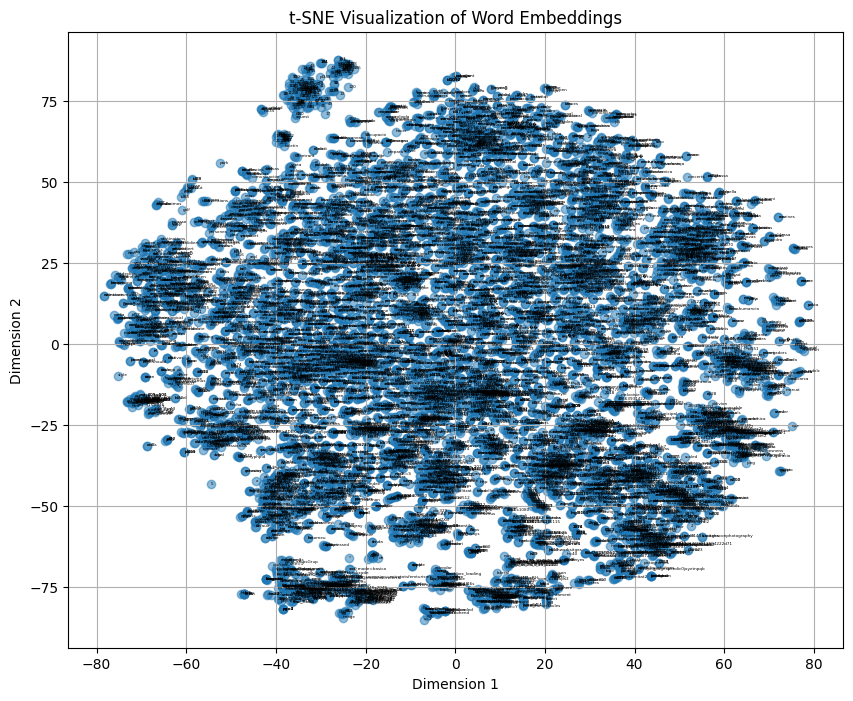

In [24]:
# get the vocabulary
vocab = list(word_vectors.key_to_index.keys())

# get the word vectors
word_vecs = [word_vectors[word] for word in vocab]

# convert word_vecs to a numpy array
word_vecs_np = np.array(word_vecs)

# use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
word_vecs_2d = tsne.fit_transform(word_vecs_np)

# plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], alpha=0.5)

# annotate points with words
for word, (x, y) in zip(vocab, word_vecs_2d):
    plt.annotate(word, (x, y), size=3)

plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [21]:
#print(df.head())
# urls = df['requested_url'][:100]
# decoded_urls = [unquote(url) for url in urls]

# create the corpus
# corpus = " ".join(decoded_urls)

# print(corpus)

In [22]:
!python --version

Python 3.9.18


In [23]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
backcall                     0.2.0
beautifulsoup4               4.12.3
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
